# Lab 1 
Graphs and data analysis


3.141592653589793


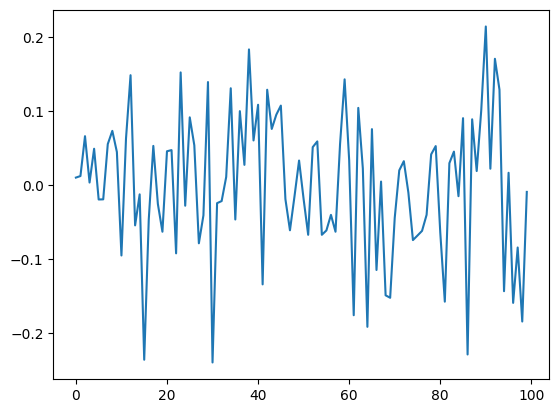

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print(math.pi) # pi value
x = np.random.randn(100,100)
y = np.mean(x,0)
plt.plot(y)
plt.show()

Q2 A function plot

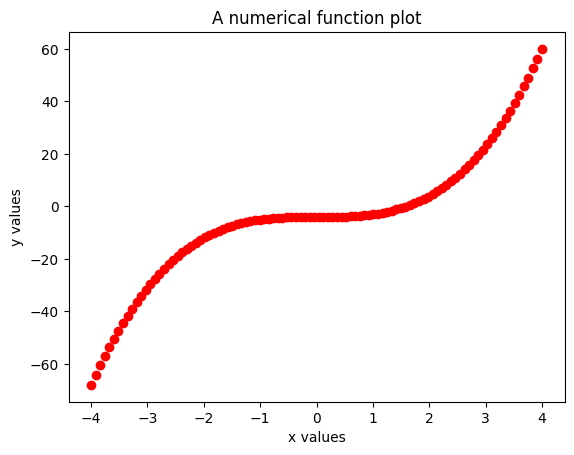

In [8]:
x = np.linspace(-4, 4, 100)
y = x**3-4
plt.scatter(x, y, c='r', marker='o')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('A numerical function plot')
plt.show()

## Regular expressions

In [10]:
import re
fhand = open('msg.txt')
for line in fhand:
    line = line.rstrip()
    if re.search('^From:', line) : #line beginning with From
        print(line)

From: Tadjouddine, Emmanuel M. (Dr.) <emt12@leicester.ac.uk>
From: SEADMISSIONS <seadmissions@leicester.ac.uk>
From: Admissions <admissions@leicester.ac.uk>
From: Braybrooke, Anthony <ab1041@leicester.ac.uk>


In [11]:
import re
msg = '@msg: Hallo from cs@le.ac.uk to cse@unilim.fr about the conf.@2PM'
emails1 = re.findall('\S+@\S+[.]+\S+',msg)
print(emails1)
emails2 = re.findall('[a-zA-Z0-9]+@[a-zA-Z]+[.]+[a-zA-Z]+[.]*[a-zA-Z]*', msg)
print(emails2)

['cs@le.ac.uk', 'cse@unilim.fr']
['cs@le.ac.uk', 'cse@unilim.fr']


<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
C:\Users\micha\AppData\Local\Temp\ipykernel_38228\568175077.py:3: SyntaxWarning: invalid escape sequence '\S'
  emails1 = re.findall('\S+@\S+[.]+\S+',msg)


## Writing functions

Q4 - temp conversion


In [12]:
def fahrenheit (celcius=0.):
    fahrnt = (9./5.)*celcius+32
    return(fahrnt)
# call the function
tf = fahrenheit(20)
print('temp in Fahrenheit is: ', tf)

temp in Fahrenheit is:  68.0


In [13]:
import pandas as pd
class DataHandler(object):
    def __init__(self, datafile):
        self.df = pd.read_csv(datafile)
    def shape(self): # number of rows and columns
        return self.df.shape
    def first_rows(self):
        return self.df.head(3)
    def last_rows(self):
        return self.df.tail(3)
    
## Testing the code
try:
    table = DataHandler('titanic3.csv') #
    print(table.first_rows())
    print(table.last_rows())
except OSError:
    print('File Not Found')

   pclass  survived                            name     sex      age  sibsp  \
0       1         1   Allen, Miss. Elisabeth Walton  female  29.0000      0   
1       1         1  Allison, Master. Hudson Trevor    male   0.9167      1   
2       1         0    Allison, Miss. Helen Loraine  female   2.0000      1   

   parch  ticket      fare    cabin embarked boat  body  \
0      0   24160  211.3375       B5        S    2   NaN   
1      2  113781  151.5500  C22 C26        S   11   NaN   
2      2  113781  151.5500  C22 C26        S  NaN   NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
      pclass  survived                       name   sex   age  sibsp  parch  \
1306       3         0  Zakarian, Mr. Mapriededer  male  26.5      0      0   
1307       3         0        Zakarian, Mr. Ortin  male  27.0      0      0   
1308       3         0         Zimmerman, Mr. Leo  male  29.0


Q6
We aim to write a function that estimates the value of π by using the Monte
Carlo method. Let us admit that π is equal to the ratio of the area of an inscribed
circle to the area of its outer square multiplied by four.
> π = (4* Area of the inner circle)/Area of the outer square  

We can then estimate π by generating n random points(x, y) within the square,
say of side 1 and count those that lie within the circle by checking if its distance
sqrt(x2 + y2 ) < = 1. If D is the total number of points inside the circle, then
 >   π = 4*D/m.  
 
If D is the total number of points inside the circle, then
Write a Monte Carlo simulation function that estimates the value of π over 1000
points and that plots its average values over 200 simulations

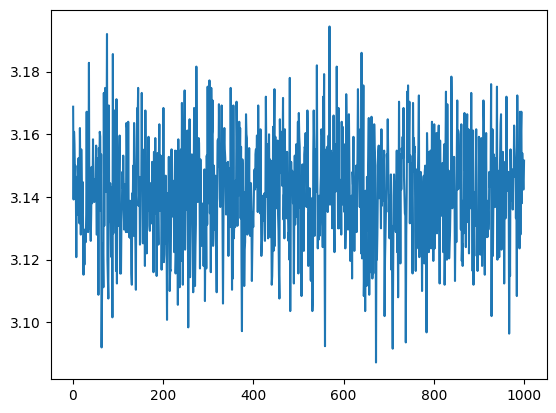

The simulated value of pi is:  3.141235200000002


In [14]:
import numpy as np
import matplotlib.pyplot as plt
def monte_carlo (n, m):
    '''
    n is the number of simulations
    m is the number of points in one simulation
    we return the average value of pi over the n simulations
    we plot the different values of pi obtained by each simulation
    '''
    pi_mean=0
    pi_values=[]
    for i in range(n):
        value=0
        x=np.random.uniform(0,1,m).tolist()
        y=np.random.uniform(0,1,m).tolist()
        for j in range(m):
            z=np.sqrt(x[j]*x[j]+y[j]*y[j])
            if z<=1:
                value+=1
        pi_value=value*4/m
        pi_values.append(pi_value)
        pi_mean += pi_value
    pi_mean = pi_mean/n
    ind=range(1,n+1)
    plt.plot(ind,pi_values)
    plt.show()
    return(pi_mean)
res = monte_carlo(1000, 10000)
print('The simulated value of pi is: ', res)